In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
path = "./Images/car_3.jpg"
image = cv2.imread(path)

In [3]:
def plot_images(img1, img2, title1= '', title2 = ''):
	fig = plt.figure(figsize = [15, 15])
	ax1 = fig.add_subplot(121)
	ax1.imshow(img1, cmap = "gray")
	ax1.set(xticks = [], yticks=[], title = title1)

	ax1 = fig.add_subplot(122)
	ax1.imshow(img2, cmap = "gray")
	ax1.set(xticks = [], yticks=[], title = title2)	
	plt.show()

In [23]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [34]:
blur = cv2.bilateralFilter(gray, 13, 90, 150)

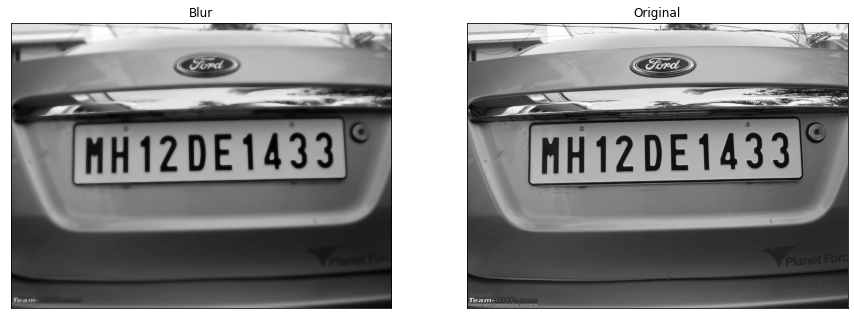

In [35]:
plot_images(blur, gray, title1 = 'Blur', title2 = 'Original')

In [36]:
edges = cv2.Canny(blur, 50, 200)

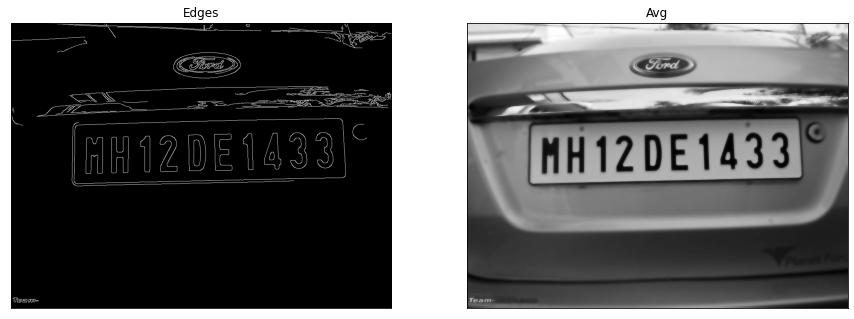

In [37]:
plot_images(edges, blur, title1 = 'Edges', title2 = 'Avg')

In [38]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255, 0, 255), 3)

In [39]:
print(len(cnts))

186


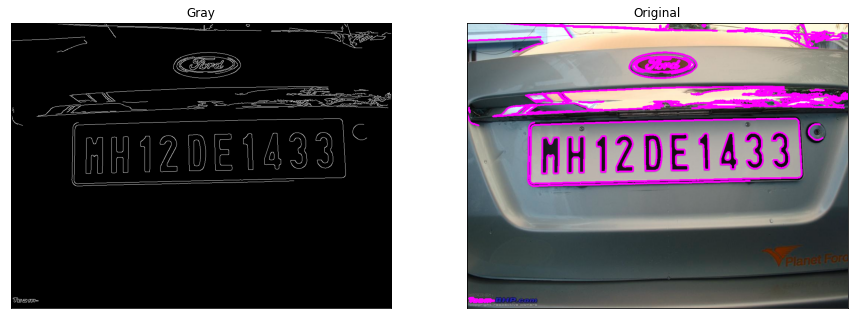

In [40]:
plot_images(edges, image_copy, title1 = 'Gray', title2 = 'Original')

In [41]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:30]

In [42]:
print(len(cnts))

30


In [43]:
image_cnts_reduced = image.copy()

In [44]:
_ = cv2.drawContours(image_cnts_reduced, cnts, -1, (255, 0, 255), 2)

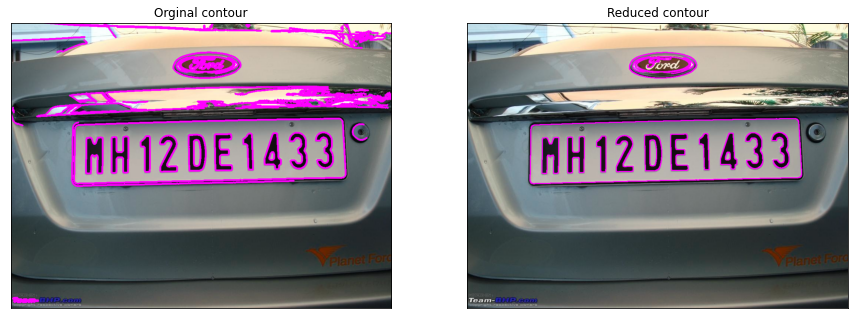

In [45]:
plot_images(image_copy, image_cnts_reduced, title1 = 'Orginal contour', title2 = 'Reduced contour')

In [46]:
plate = None
for c in cnts:
	perimeter = cv2.arcLength(c, True)
	edges_count = cv2.approxPolyDP(c, 0.02* perimeter, True)
	if len(edges_count) == 4:
		x,y,w,h = cv2.boundingRect(c)
		plate = image[y:y+h, x:x+w]
		break

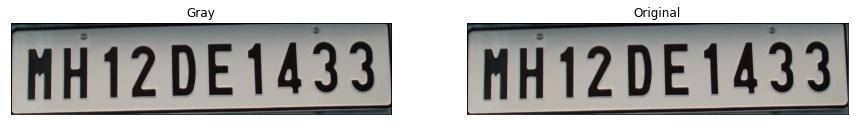

In [47]:
plot_images(plate, plate, title1 = 'Gray', title2 = 'Original')

In [48]:
import pytesseract

In [49]:
text = pytesseract.image_to_string(plate, lang = 'eng')

In [50]:
print(text)

MH12DE1433
